In [2]:
import numpy as np

In [182]:
#1 Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.
arr=np.random.random((10,3))
i=(np.arange(10),np.abs(arr-0.5).argmin(axis=1))
print(arr)
print(arr[i])

[[0.12480161 0.63875171 0.31403633]
 [0.72607799 0.59856601 0.21624025]
 [0.0679847  0.63959328 0.15384641]
 [0.96792571 0.83542558 0.76291071]
 [0.82846182 0.84506632 0.33704522]
 [0.59081473 0.66433227 0.06091042]
 [0.4333452  0.63063489 0.15385788]
 [0.06416266 0.7228656  0.67392671]
 [0.42341681 0.35499373 0.2795801 ]
 [0.26844254 0.88917774 0.20385407]]
[0.63875171 0.59856601 0.63959328 0.76291071 0.33704522 0.59081473
 0.4333452  0.67392671 0.42341681 0.26844254]


In [183]:
#2 Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.
arr = np.random.random((6, 6))
print(arr)
print(arr.sum(axis=1) / arr.min(axis=0))

[[0.52568753 0.60809309 0.9947622  0.32830515 0.56905117 0.40835819]
 [0.72433811 0.05467256 0.36949581 0.61097126 0.41533319 0.90869706]
 [0.37863945 0.18637296 0.30688833 0.75596906 0.31398403 0.49946565]
 [0.03002808 0.41421399 0.09360919 0.48376445 0.85979622 0.12613787]
 [0.00745954 0.37728909 0.46123308 0.47929125 0.09161642 0.41881565]
 [0.71358895 0.99148301 0.73308462 0.39864099 0.84696581 0.89838862]]
[460.3845926   56.39955873  26.07991365   6.11488971  20.03685589
  36.32653579]


In [184]:
#3 На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.
arr=np.array([6,2,0,3,0,0,5,7,0])
arr[np.where(arr[:-1] == 0)[0] + 1].max()

5

In [185]:
#4
arr1=np.ones(10)
arr2=np.array([0,1,2,3,5,5,5,8])
np.add.at(arr1,arr2,1)
print(arr1)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [186]:
#5
n = 4
arr = np.arange(16).reshape(n, n)
d = {3-j: np.diagonal(arr[:, ::-1], j).tolist() for j in range(3, -4, -1) } 
print(d)

{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


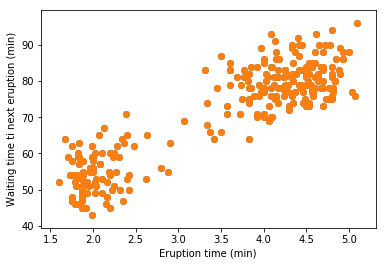

In [192]:
#6
import matplotlib.pyplot as plt

data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]

plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')

plt.scatter(*data.T)
plt.show()
data = (data - data.mean(axis=0)) / data.std(axis=0)

centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))


#plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
#plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
#plt.title('Predicted Classes')
#plt.show()

In [195]:
def get_labels(pts, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def kmeans(obs, k, iter=20, thresh=1e-05):
    centroids = np.random.random((k, 2))
    labels = get_labels(obs, centroids)
    norm = norma(obs, centroids, labels)
    minnm = norm
    newcen = centroids
        
        
    for i in range(iter):
        prevnm = norm
        centroids = np.array([obs[labels == i].mean(axis=0) for i in range(k)])
        labels = get_labels(obs, centroids)
        norm = norma(obs, centroids, labels)       
        if norm < minnm:
            newcen = centroids
            minnm = norm
   
        if abs(norm - prevnm) < thresh:
            break
            
    return newcen

def norma(obs, centroids, labels):
    ans = 0
    for i in range(centroids.shape[0]):
        ans+= abs(np.linalg.norm(obs[i==labels] - centroids[i], axis=1).sum())
    return ans

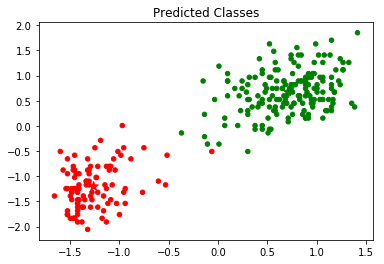

In [196]:
centroids = kmeans(data, 2)
labels = get_labels(data, centroids)
plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()
#print(centroids)